In [549]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [550]:
import os

output_dir = "Pictures/1.EDA Figures"
os.makedirs(output_dir, exist_ok=True)

### Import Sales data from csv

In [551]:
df = pd.read_csv("Real_Estate_Sales_2001-2023.csv")
df.head()
#df.head()

C:\Users\geoff\AppData\Local\Temp\ipykernel_21104\4023316076.py:1: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Real_Estate_Sales_2001-2023.csv")


Serial Number  List Year Date Recorded     Town          Address  \
0        2020177       2020    04/14/2021  Ansonia    323 BEAVER ST   
1        2020225       2020    05/26/2021  Ansonia   152 JACKSON ST   
2        2020348       2020    09/13/2021  Ansonia  230 WAKELEE AVE   
3        2020090       2020    12/14/2020  Ansonia      57 PLATT ST   
4         210288       2021    06/20/2022     Avon   12 BYRON DRIVE   

   Assessed Value  Sale Amount Sales Ratio Property Type Residential Type  \
0        133000.0     248400.0      0.5354   Residential    Single Family   
1        110500.0     239900.0      0.4606   Residential     Three Family   
2        150500.0     325000.0       0.463    Commercial              NaN   
3        127400.0     202500.0      0.6291   Residential       Two Family   
4        179990.0     362500.0      0.4965   Residential            Condo   

  Non Use Code Assessor Remarks OPM remarks  \
0          NaN              NaN         NaN   
1          NaN              NaN         NaN   
2          NaN              NaN         NaN   
3          NaN              NaN         NaN   
4          NaN              NaN         NaN   

                             Location  
0          POINT (-73.06822 41.35014)  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4  POINT (-72.879115982 41.773452988)

### Remove Null Values

In [552]:
# Columns ---> Non Use Code, Assessor Remarks, OPM remarks, Location have mostly Nulls and we are adding location separately
df.isnull().sum()
df = df.iloc[:,0:10]
df.head()

Serial Number  List Year Date Recorded     Town          Address  \
0        2020177       2020    04/14/2021  Ansonia    323 BEAVER ST   
1        2020225       2020    05/26/2021  Ansonia   152 JACKSON ST   
2        2020348       2020    09/13/2021  Ansonia  230 WAKELEE AVE   
3        2020090       2020    12/14/2020  Ansonia      57 PLATT ST   
4         210288       2021    06/20/2022     Avon   12 BYRON DRIVE   

   Assessed Value  Sale Amount Sales Ratio Property Type Residential Type  
0        133000.0     248400.0      0.5354   Residential    Single Family  
1        110500.0     239900.0      0.4606   Residential     Three Family  
2        150500.0     325000.0       0.463    Commercial              NaN  
3        127400.0     202500.0      0.6291   Residential       Two Family  
4        179990.0     362500.0      0.4965   Residential            Condo

In [553]:
# Rows with null date recorded should be dropped
df = df.dropna(subset=["Date Recorded"])
# Keep rows with Addresss blanks
# Property Type and Residential Type as Unknown

In [554]:
df["Property Type"] = df["Property Type"].fillna("Unknown")
df["Residential Type"] = df["Residential Type"].fillna("Unknown")
#.unique()

In [555]:
df[df["Sales Ratio"].isnull()]
df = df.dropna(subset=["Sales Ratio"])

In [556]:
df.isnull().sum()

Serial Number        0
List Year            0
Date Recorded        0
Town                 0
Address             49
Assessed Value       0
Sale Amount          0
Sales Ratio          0
Property Type        0
Residential Type     0
dtype: int64

In [557]:
# Zero Values
print(f"Sale Amount Zeros Removed: {(df["Sale Amount"] ==0).sum()}")
print(f"Assessed Value Zeros Removed: {(df["Assessed Value"] ==0).sum()}")

df = df[df["Sale Amount"] >0]
df = df[df["Assessed Value"] > 0]

Sale Amount Zeros Removed: 1808
Assessed Value Zeros Removed: 7336


In [558]:
# Remove blanks from Town name
# Make town names title case
df['Town'] = df['Town'].str.strip()
df['Town']  = df['Town'].str.title()

In [559]:
df = df.drop("List Year",axis=1,errors='ignore')
df.head()

Serial Number Date Recorded     Town          Address  Assessed Value  \
0        2020177    04/14/2021  Ansonia    323 BEAVER ST        133000.0   
1        2020225    05/26/2021  Ansonia   152 JACKSON ST        110500.0   
2        2020348    09/13/2021  Ansonia  230 WAKELEE AVE        150500.0   
3        2020090    12/14/2020  Ansonia      57 PLATT ST        127400.0   
4         210288    06/20/2022     Avon   12 BYRON DRIVE        179990.0   

   Sale Amount Sales Ratio Property Type Residential Type  
0     248400.0      0.5354   Residential    Single Family  
1     239900.0      0.4606   Residential     Three Family  
2     325000.0       0.463    Commercial          Unknown  
3     202500.0      0.6291   Residential       Two Family  
4     362500.0      0.4965   Residential            Condo

In [560]:
Other_blanks_in_df = (df == "").sum() + (df == " ").sum() + (df == "NULL").sum() + (df == "N/A").sum() + (df == "na").sum()

print(Other_blanks_in_df)

Serial Number       0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64


### Standardise & Drop Irrelevant Columns

In [561]:
# Date Recorded needs to be standardised 
# Errors '11/29/0023' & '03/15/0024'
df["Date Recorded"] = df["Date Recorded"].str.replace("0022","2022", regex=False)
df["Date Recorded"] = df["Date Recorded"].str.replace("0023","2023", regex=False)
df["Date Recorded"] = df["Date Recorded"].str.replace("0024", "2024", regex=False)

In [562]:
# Change date recorded data type
df["Date Recorded"] = pd.to_datetime(df["Date Recorded"])
# Update other column data types
df["Town"] = df["Town"].astype("string")
df["Address"] = df["Address"].astype("string")
df["Property Type"] = df["Property Type"].astype("string")
df["Residential Type"] = df["Residential Type"].astype("string")

In [563]:
# Identity Error due to different formatting
#df[df["Sales Ratio"] == "1,787.3333"]
df["Sales Ratio"] = df["Sales Ratio"].str.replace(",","")

In [564]:
df["Sales Ratio"] = df["Sales Ratio"].astype("float32", errors = "raise")  
df["Sale Amount"] = df["Sale Amount"].astype("float32", errors = "raise")  
df["Assessed Value"] = df["Assessed Value"].astype("float32", errors = "raise")
df.dtypes

Serial Number                int64
Date Recorded       datetime64[ns]
Town                string[python]
Address             string[python]
Assessed Value             float32
Sale Amount                float32
Sales Ratio                float32
Property Type       string[python]
Residential Type    string[python]
dtype: object

In [565]:
df.sort_values("Date Recorded")

Serial Number Date Recorded        Town  \
914851          170177    1999-04-05  New London   
935401          173165    2001-08-01     Shelton   
939176          173202    2001-08-23     Shelton   
446643           60626    2001-09-04   Newington   
487180           60631    2001-09-05   Newington   
...                ...           ...         ...   
1098554         231617    2024-09-30  Bridgeport   
1138347         230169    2024-09-30    Old Lyme   
1125078         230195    2024-10-02      Putnam   
1116461         230338    2024-10-02   East Lyme   
1129762         230194    2024-10-02      Putnam   

                                Address  Assessed Value  Sale Amount  \
914851               184 PEQUOT AVE 309         46690.0      95000.0   
935401                 19 BLACKBERRY LA        390810.0     635000.0   
939176                12 BOYSENBERRY LA        427910.0     558000.0   
446643                    110 MOYLAN CT         64750.0      88000.0   
487180                  48 EVERGREEN RD        166110.0     256000.0   
...                                 ...             ...          ...   
1098554         433 RIDGEFIELD AVE #435        171714.0     652000.0   
1138347  20 STANHOPE AVE & 6 HUBBARD RD        296500.0     555000.0   
1125078            23 MECHANICS ST #101         32200.0      80000.0   
1116461           138 BOSTON POST RD #7        209720.0     464000.0   
1129762                74 PERRY ST #183        122200.0     310000.0   

         Sales Ratio  Property Type Residential Type  
914851           NaN          Condo            Condo  
935401           NaN  Single Family    Single Family  
939176           NaN  Single Family    Single Family  
446643           NaN          Condo            Condo  
487180           NaN  Single Family    Single Family  
...              ...            ...              ...  
1098554          NaN    Residential     Three Family  
1138347       0.5342    Residential    Single Family  
1125078       0.4025    Residential            Condo  
1116461       0.4520    Residential            Condo  
1129762       0.3941    Residential            Condo  

[1132861 rows x 9 columns]

In [566]:
# Rename Columns
df = df.rename(columns = {"Assessed Value":"Assessed Value (USD)", "Sale Amount":"Sale Amount (USD)"})
df.head()

Serial Number Date Recorded     Town          Address  \
0        2020177    2021-04-14  Ansonia    323 BEAVER ST   
1        2020225    2021-05-26  Ansonia   152 JACKSON ST   
2        2020348    2021-09-13  Ansonia  230 WAKELEE AVE   
3        2020090    2020-12-14  Ansonia      57 PLATT ST   
4         210288    2022-06-20     Avon   12 BYRON DRIVE   

   Assessed Value (USD)  Sale Amount (USD)  Sales Ratio Property Type  \
0              133000.0           248400.0          NaN   Residential   
1              110500.0           239900.0          NaN   Residential   
2              150500.0           325000.0          NaN    Commercial   
3              127400.0           202500.0          NaN   Residential   
4              179990.0           362500.0          NaN   Residential   

  Residential Type  
0    Single Family  
1     Three Family  
2          Unknown  
3       Two Family  
4            Condo

In [567]:
# Recalculate % Profit on Sale where available to replace sales ratio since it is inconsistent and sparsely populated.
df["% Profit on Sale"] =  (df["Sale Amount (USD)"] / df["Assessed Value (USD)"] -1) *100
df = df.drop("Sales Ratio", axis=1, errors= "ignore")

In [568]:
df.head()

Serial Number Date Recorded     Town          Address  \
0        2020177    2021-04-14  Ansonia    323 BEAVER ST   
1        2020225    2021-05-26  Ansonia   152 JACKSON ST   
2        2020348    2021-09-13  Ansonia  230 WAKELEE AVE   
3        2020090    2020-12-14  Ansonia      57 PLATT ST   
4         210288    2022-06-20     Avon   12 BYRON DRIVE   

   Assessed Value (USD)  Sale Amount (USD) Property Type Residential Type  \
0              133000.0           248400.0   Residential    Single Family   
1              110500.0           239900.0   Residential     Three Family   
2              150500.0           325000.0    Commercial          Unknown   
3              127400.0           202500.0   Residential       Two Family   
4              179990.0           362500.0   Residential            Condo   

   % Profit on Sale  
0         86.766922  
1        117.104080  
2        115.946838  
3         58.948196  
4        101.400085

In [569]:
# Date ranges seem reasonable. Apr 1999 to Oct 2024
df["Date Recorded"].min()
df["Date Recorded"].max()

Timestamp('2024-10-02 00:00:00')

In [570]:
# Check for Negative Values
(df["Assessed Value (USD)"]<0).sum()
(df["Sale Amount (USD)"]<0).sum()

np.int64(0)

In [571]:
df["Property Type"].value_counts()

Property Type
Single Family     400745
Unknown           376161
Residential       190270
Condo             104314
Two Family         26384
Three Family       12585
Vacant Land         9874
Commercial          7810
Four Family         2149
Apartments          1529
Industrial          1029
Public Utility        11
Name: count, dtype: Int64

In [572]:
df["Residential Type"].value_counts()
#df[df["Property Type"] == "Unknown"]

Residential Type
Single Family    534378
Unknown          396414
Condo            144086
Two Family        37149
Three Family      17669
Four Family        3165
Name: count, dtype: Int64

In [573]:
# Where Property Type = Residential, the more granular Residential Type was used to improve analytical resolution.
# Replace 'Residential' in 'Property Type' with 'Residential Type' values
df.loc[df['Property Type'] == 'Residential', 'Property Type'] = df['Residential Type']

In [574]:
df = df.drop("Residential Type", axis=1,errors='ignore')
df["Property Type"].value_counts()

Property Type
Single Family     534378
Unknown           376161
Condo             144086
Two Family         37149
Three Family       17669
Vacant Land         9874
Commercial          7810
Four Family         3165
Apartments          1529
Industrial          1029
Public Utility        11
Name: count, dtype: Int64

### Remove duplicates

In [575]:
# Check for duplicates
#df.duplicated("Serial Number").sum()

#Serial numbers can repeat across years
# Address + town uniquely identify a transaction more reliably

df = df.drop_duplicates(subset = ["Serial Number","Town","Address"])
print(df.duplicated(subset = ["Serial Number","Town","Address"]).sum())

print(df.duplicated().sum())

0
0


In [576]:
# df.sort_values("Serial Number")
# df["Serial Number"].value_counts()
# df[df["Serial Number"]==10010]
# There appears to be Serial Numbers repeated for different sales
df = df.drop("Serial Number", axis=1,errors='ignore')

### Add CPI data and adjust sales and valuations

In [577]:
#df["Year"] = 
df["Year"] = df["Date Recorded"].dt.year

In [578]:
# Extract Average annual CPIs from Federal Reserve Website (https://fred.stlouisfed.org/series/CPIAUCSL?utm) 
cosd = "1999-01-01"
coed = "2025-06-31"
vintage_date = "1999-01-01"
revision_date = "2025-06-31"

url1 = f"""https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23ebf3fb&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=off&txtcolor=%23444444&ts=12&tts=12&width=1320&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd={cosd}&coed={coed}&line_color=%230073e6&link_values=false&line_style=solid&mark_type=none&mw=3&lw=3&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date={vintage_date}&revision_date={revision_date}&nd=1947-01-01"""

CPI_Data = pd.read_csv(url1)

CPI_Data = CPI_Data.rename(columns={"observation_date":"Year","CPIAUCSL":"US City Average CPI"}) 
CPI_Data["Year"] = pd.to_datetime(CPI_Data["Year"]).dt.year

CPI_Data = CPI_Data.sort_values(by="Year",axis=0,ascending=False)


In [579]:
CPI_Data.head()
#CPI_Data.dtypes

Year  US City Average CPI
26  2025                  NaN
25  2024              313.698
24  2023              304.704
23  2022              292.625
22  2021              270.968

In [580]:
df = df.merge(CPI_Data, on='Year', how='left')

In [581]:
df = df.sort_values(by="Date Recorded",axis=0,ascending=True)
df.head()

Date Recorded        Town             Address  Assessed Value (USD)  \
906649    1999-04-05  New London  184 PEQUOT AVE 309               46690.0   
927135    2001-08-01     Shelton    19 BLACKBERRY LA              390810.0   
930890    2001-08-23     Shelton   12 BOYSENBERRY LA              427910.0   
440752    2001-09-04   Newington       110 MOYLAN CT               64750.0   
480759    2001-09-05   Newington     48 EVERGREEN RD              166110.0   

        Sale Amount (USD)  Property Type  % Profit on Sale  Year  \
906649            95000.0          Condo        103.469704  1999   
927135           635000.0  Single Family         62.483047  2001   
930890           558000.0  Single Family         30.401253  2001   
440752            88000.0          Condo         35.907341  2001   
480759           256000.0  Single Family         54.114746  2001   

        US City Average CPI  
906649              166.583  
927135              177.042  
930890              177.042  
440752              177.042  
480759              177.042

In [582]:
target_year = 2024
target_cpi = CPI_Data.loc[CPI_Data["Year"] == target_year, "US City Average CPI"].iloc[0]
print(target_cpi)

313.698


In [583]:
df["CPI Adjusted Assessed Value (USD)"] = df["Assessed Value (USD)"] * (target_cpi / df["US City Average CPI"])
df["CPI Adjusted Sale Amount (USD)"] = df["Sale Amount (USD)"] * (target_cpi / df["US City Average CPI"])

In [584]:
df.head()

Date Recorded        Town             Address  Assessed Value (USD)  \
906649    1999-04-05  New London  184 PEQUOT AVE 309               46690.0   
927135    2001-08-01     Shelton    19 BLACKBERRY LA              390810.0   
930890    2001-08-23     Shelton   12 BOYSENBERRY LA              427910.0   
440752    2001-09-04   Newington       110 MOYLAN CT               64750.0   
480759    2001-09-05   Newington     48 EVERGREEN RD              166110.0   

        Sale Amount (USD)  Property Type  % Profit on Sale  Year  \
906649            95000.0          Condo        103.469704  1999   
927135           635000.0  Single Family         62.483047  2001   
930890           558000.0  Single Family         30.401253  2001   
440752            88000.0          Condo         35.907341  2001   
480759           256000.0  Single Family         54.114746  2001   

        US City Average CPI  CPI Adjusted Assessed Value (USD)  \
906649              166.583                       87923.495315   
927135              177.042                      692470.235198   
930890              177.042                      758207.155251   
440752              177.042                      114729.530281   
480759              177.042                      294327.757142   

        CPI Adjusted Sale Amount (USD)  
906649                    1.788977e+05  
927135                    1.125147e+06  
930890                    9.887116e+05  
440752                    1.559258e+05  
480759                    4.536025e+05

### Add supporting data files

In [585]:
Town_GEOJSON_DATA = pd.read_json("ct-towns-2021-datactgov.geojson")

In [586]:
towns = [f["properties"]["town"] for f in Town_GEOJSON_DATA["features"]]
#print(towns.describe())
len(towns)

169

In [587]:
# We need to check that the GEOJSON file has all the towns in our data 
# Identify any mismatches (misspellings, missing towns, different naming conventions)
# Create Sets
geojson_towns = set(towns)
df_towns = set(df["Town"].unique())
# Compare
missing_in_geojson = df_towns - geojson_towns
not_in_df = geojson_towns - df_towns
print("Missing in GeoJSON:", missing_in_geojson)
print("Not in DF:", not_in_df)

Missing in GeoJSON: {'***Unknown***'}
Not in DF: set()


In [588]:
### ADD 2023 5 YEAR AVERAGE CENSUS DATA 
# https://www.ctdata.org/data-by-topic 

In [589]:
Household_Income = pd.read_csv("Median_Household_Income_2023.csv")
Household_Income = Household_Income.loc[:,["Geography Name","Value","Margin of Error"]]

In [590]:
Household_Income = Household_Income.rename(columns = {"Geography Name":"Town"})
Household_Income = Household_Income.sort_values(by="Town",axis=0,ascending=True)
Household_Income["Town"] = Household_Income["Town"].astype("string")
Household_Income.head()

Town   Value  Margin of Error
10      Andover  127335          20643.0
67      Ansonia   80585           8385.0
74      Ashford  129219          34182.0
11         Avon  151481          10085.0
95  Barkhamsted  119255          10168.0

In [591]:
Household_Income.dtypes

Town               string[python]
Value                       int64
Margin of Error           float64
dtype: object

In [592]:
# Checking for duplicates and nulls
# Household_Income[Household_Income["Margin of Error"].isnull()]
# Household_Income.duplicated().sum()

In [593]:
Population = pd.read_csv("Population.csv")
Population = Population.rename(columns = {"Geography Name":"Town"})
Population["Town"] = Population["Town"].astype("string")

In [594]:
# Household_Income[Household_Income["Margin of Error"].isnull()]
Population.duplicated().sum()
Population.isnull().sum()

Year               0
GeoID              0
Geography Type     0
Town               0
Sex                0
Race               0
Age                0
Value              0
Margin of Error    0
ObjectId           0
dtype: int64

In [595]:
Population = Population.loc[:,["Year","Town","Value"]]
Population["Value"] = Population["Value"]/1000
Population = Population.rename({"Value":"Population in 000s"},axis=1)

Total_Population = Population.groupby(by=["Year"]).sum("Population in 000s")
Population_by_Town = Population.groupby(by=["Year","Town"]).sum("Population in 000s").reset_index()
# Population_by_Town.head()
Total_Population.head()

Population in 000s
Year                    
2010            3992.948
2011            4021.579
2012            4052.398
2013            4080.500
2014            4104.848

In [596]:
# Total_Population.isnull().sum()
# Total_Population.duplicated().sum()
print(Population_by_Town.isnull().sum())
print(Population_by_Town.duplicated().sum())

Year                  0
Town                  0
Population in 000s    0
dtype: int64
0


In [597]:
Education = pd.read_csv("Education.csv")
Education = Education.rename(columns = {"Geography Name":"Town","Value":"% Less Than High School Diploma"})
Education["Town"] = Education["Town"].astype("string")
Education =  Education.groupby(["Year","Town"]).mean("% Less Than High School Diploma").reset_index()
Education = Education.loc[:,["Year","Town","% Less Than High School Diploma"]]
Education.head()

Year         Town  % Less Than High School Diploma
0  2010      Andover                             8.70
1  2010      Ansonia                            15.15
2  2010      Ashford                             8.20
3  2010         Avon                             4.40
4  2010  Barkhamsted                             6.10

In [598]:
print(Education.isnull().sum())
print(Education.duplicated().sum())

Year                               0
Town                               0
% Less Than High School Diploma    0
dtype: int64
0


In [599]:
Poverty_Status = pd.read_csv("Poverty_Status.csv")
Poverty_Status = Poverty_Status.rename({"Geography Name":"Town", "Value":"% Under Poverty Line"},axis=1)
Poverty_Status["Town"] = Poverty_Status["Town"].astype("string")
Poverty_Status =  Poverty_Status.groupby(["Year","Town"]).mean("% Under Poverty Line").reset_index()
Poverty_Status = Poverty_Status.loc[:,["Year","Town","% Under Poverty Line"]]
Poverty_Status.head()

Year         Town  % Under Poverty Line
0  2023      Andover                   0.9
1  2023      Ansonia                   8.6
2  2023      Ashford                   4.8
3  2023         Avon                   4.8
4  2023  Barkhamsted                   4.7

In [600]:
Poverty_Status.dtypes
Poverty_Status["% Under Poverty Line"] = Poverty_Status["% Under Poverty Line"]/100
Poverty_Status.head()

Year         Town  % Under Poverty Line
0  2023      Andover                 0.009
1  2023      Ansonia                 0.086
2  2023      Ashford                 0.048
3  2023         Avon                 0.048
4  2023  Barkhamsted                 0.047

In [601]:
print(Poverty_Status.isnull().sum())
print(Poverty_Status.duplicated().sum())

Year                    0
Town                    0
% Under Poverty Line    0
dtype: int64
0


In [602]:
#Names of data frames
# df ---> df with all the sales
# Town_GEOJSON_DATA ---> Map data
# Household_Income -->
# Total_Population
# Population_by_Town
# Education
# Poverty_Status

### Q 1.1 - How have sales price trends changed over the 2001–2023 period overall?

In [603]:
df["CPI Adjusted Sale Amount (USD)"] =  df["CPI Adjusted Sale Amount (USD)"]/1000
df["CPI Adjusted Assessed Value (USD)"] =  df["CPI Adjusted Assessed Value (USD)"]/1000

In [604]:
df.columns = ['Date Recorded', 'Town', 'Address', 'Assessed Value (USD)',
       'Sale Amount (USD)', 'Property Type','% Profit on Sale', 'Year',
       'US City Average CPI', 'CPI Adjusted Assessed Value (In Thousands USD)',
       'CPI Adjusted Sale Amount (In Thousands USD)']
df.head(1)

Date Recorded        Town             Address  Assessed Value (USD)  \
906649    1999-04-05  New London  184 PEQUOT AVE 309               46690.0   

        Sale Amount (USD) Property Type  % Profit on Sale  Year  \
906649            95000.0         Condo        103.469704  1999   

        US City Average CPI  CPI Adjusted Assessed Value (In Thousands USD)  \
906649              166.583                                       87.923495   

        CPI Adjusted Sale Amount (In Thousands USD)  
906649                                   178.897667

In [605]:
df["Date Recorded"].min()

Timestamp('1999-04-05 00:00:00')

In [606]:
df["Date Recorded"] = df["Date Recorded"].dt.floor("D")
df["Date Recorded"]
df["YearMonth"] = df["Date Recorded"].dt.to_period("M").dt.to_timestamp()

In [607]:
df["YearMonth"].head()

906649   1999-04-01
927135   2001-08-01
930890   2001-08-01
440752   2001-09-01
480759   2001-09-01
Name: YearMonth, dtype: datetime64[ns]

In [608]:
df[df.duplicated(["Date Recorded","Property Type","Address","CPI Adjusted Sale Amount (In Thousands USD)"])].head()

Date Recorded     Town          Address  Assessed Value (USD)  \
147024    2001-10-01   Bethel   5 ELIZABETH ST              122860.0   
136800    2001-10-01   Bethel   5 ELIZABETH ST              122860.0   
144775    2001-10-01   Berlin  44 RESERVOIR RD               89360.0   
136534    2001-10-01   Bethel   5 ELIZABETH ST              122860.0   
131887    2001-10-01  Bristol     47 SYLVIA LN               65010.0   

        Sale Amount (USD) Property Type  % Profit on Sale  Year  \
147024            19600.0       Unknown        -84.046883  2001   
136800            19600.0       Unknown        -84.046883  2001   
144775            30000.0       Unknown        -66.427933  2001   
136534            19600.0       Unknown        -84.046883  2001   
131887            40500.0       Unknown        -37.701893  2001   

        US City Average CPI  CPI Adjusted Assessed Value (In Thousands USD)  \
147024              177.042                                      217.693747   
136800              177.042                                      217.693747   
144775              177.042                                      158.335611   
136534              177.042                                      217.693747   
131887              177.042                                      115.190220   

        CPI Adjusted Sale Amount (In Thousands USD)  YearMonth  
147024                                    34.728939 2001-10-01  
136800                                    34.728939 2001-10-01  
144775                                    53.156539 2001-10-01  
136534                                    34.728939 2001-10-01  
131887                                    71.761328 2001-10-01

In [609]:
# Property prices are right-skewed.
# IQR outliers were flagged for inspection, but not removed by default.
    
def flag_outliers_iqr(df, col, k=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - k * IQR
    upper = Q3 + k * IQR

    flag_col = f"{col}_iqr_outlier"
    df[flag_col] = (df[col] < lower) | (df[col] > upper)

    return df, lower, upper
df = flag_outliers_iqr(df, "CPI Adjusted Sale Amount (In Thousands USD)")[0]
df = flag_outliers_iqr(df, "CPI Adjusted Assessed Value (In Thousands USD)")[0]

In [610]:
df.loc[:,["CPI Adjusted Sale Amount (In Thousands USD)_iqr_outlier","CPI Adjusted Assessed Value (In Thousands USD)_iqr_outlier"]].value_counts()

CPI Adjusted Sale Amount (In Thousands USD)_iqr_outlier  CPI Adjusted Assessed Value (In Thousands USD)_iqr_outlier
False                                                    False                                                         1006773
True                                                     True                                                            76114
False                                                    True                                                            29293
True                                                     False                                                           20680
Name: count, dtype: int64

In [611]:

df["CPI Adjusted Sale Amount (In Thousands USD)"].describe()
#.iloc[1]

count    1.132860e+06
mean     5.560945e+02
std      5.968353e+03
min      1.249295e-03
25%      2.047629e+02
50%      3.239273e+02
75%      5.211011e+02
max      5.788469e+06
Name: CPI Adjusted Sale Amount (In Thousands USD), dtype: float64

In [612]:
Sales_Over_Time = df.loc[:,["YearMonth","CPI Adjusted Sale Amount (In Thousands USD)"]]
Sales_Over_Time["CPI Adjusted Sale Amount (In Thousands USD)"] = Sales_Over_Time["CPI Adjusted Sale Amount (In Thousands USD)"]/1000000
Sales_Over_Time = Sales_Over_Time.rename(columns= {"CPI Adjusted Sale Amount (In Thousands USD)":"CPI Adjusted Sale Amount (In Billion USD)"})
Sales_Over_Time = Sales_Over_Time.groupby(by="YearMonth").sum("CPI Adjusted Sale Amount (In Billion USD)").reset_index()
Sales_Over_Time.head(10)

YearMonth  CPI Adjusted Sale Amount (In Billion USD)
0 1999-04-01                                   0.000179
1 2001-08-01                                   0.002114
2 2001-09-01                                   0.001130
3 2001-10-01                                   2.012632
4 2001-11-01                                   1.714344
5 2001-12-01                                   1.853885
6 2002-01-01                                   1.662435
7 2002-02-01                                   1.420928
8 2002-03-01                                   1.793349
9 2002-04-01                                   1.975928

In [613]:
Sales_Over_Time.max()

YearMonth                                    2024-10-01 00:00:00
CPI Adjusted Sale Amount (In Billion USD)               9.619463
dtype: object

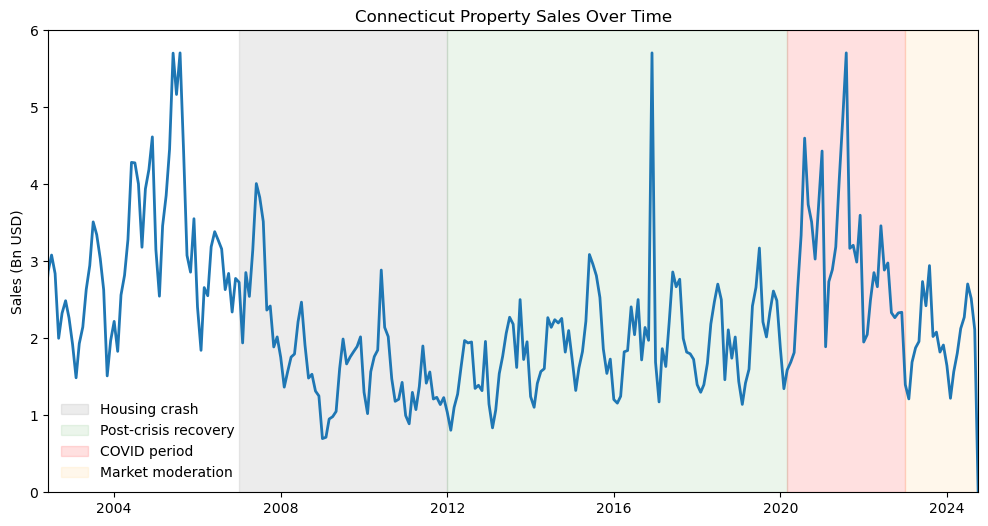

In [614]:
plt.figure(figsize=(12,6))

# Winsorise for visualisation only
upper = Sales_Over_Time["CPI Adjusted Sale Amount (In Billion USD)"].quantile(0.99)
Sales_Over_Time["Sale Amount (In Billion USD)"] = (
    Sales_Over_Time["CPI Adjusted Sale Amount (In Billion USD)"].clip(upper=upper)
)

ax = sns.lineplot(
    data=Sales_Over_Time,
    x="YearMonth",
    y="Sale Amount (In Billion USD)",
    linewidth=2
)

# Highlight key periods
ax.axvspan(
    pd.to_datetime("2007-01-01"),
    pd.to_datetime("2011-12-31"),
    color="grey",
    alpha=0.15,
    label="Housing crash"
)

ax.axvspan(
    pd.to_datetime("2012-01-01"),
    pd.to_datetime("2020-03-01"),
    color="green",
    alpha=0.08,
    label="Post-crisis recovery"
)

ax.axvspan(
    pd.to_datetime("2020-03-01"),
    pd.to_datetime("2022-12-31"),
    color="red",
    alpha=0.12,
    label="COVID period"
)

ax.axvspan(
    pd.to_datetime("2023-01-01"),
    pd.to_datetime("2024-10-01"),
    color="orange",
    alpha=0.08,
    label="Market moderation"
)

# Titles & labels
ax.set_title("Connecticut Property Sales Over Time")
ax.set_xlabel("")
ax.set_ylabel("Sales (Bn USD)")
ax.set_ylim(0, 6)
ax.set_xlim(
    pd.to_datetime("2002-06-01"),
    pd.to_datetime("2024-10-01")
)

# Legend (only for shaded regions)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-4:], labels[-4:], frameon=False)

# Save figure using title
title = ax.get_title().replace(" ", "_").lower()
plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

### Observations

**Clear Sales volatility throughout years**

**2007–2011: The US housing crash**
- Sales values flatten or decline.
- Recovery is slow and uneven.
- Credit tightening, Foreclosures, Reduced transaction volumes.

**2012–2019: steady recovery phase**
- Gradual, consistent growth.
- Less volatility than pre-2007 period.
- Market stabilisation supported by sustained low interest rates.

**2020–2022: sharp acceleration**
- Sales values increase significantly faster than historical trends.
- Historically low mortgage rates and demand shifts contribute to rapid price appreciation.

**2022–2023: plateau or moderation**
- Growth in sales values slows or plateaus.
- Rising interest rates, elevated inflation, and affordability constraints dampen momentum.

**As prices rise, absolute changes naturally grow. This informs log scale use in later plots**

### Q 1.2 - How have sales price trends changed over the 2001–2023 period by property type?

In [615]:
df["Property Type"] = df["Property Type"].replace({
    "Condo": "Apartment/Condo",
    "Apartments": "Apartment/Condo",
     "Single Family": "1 & 2 Family",
    "Two Family":"1 & 2 Family",
    "Three Family":"3 & 4 Family" ,
    "Four Family":"3 & 4 Family",
    "Vacant Land": "Vacant Land",
    "Commercial":"Comm / Ind / Utility",
    "Industrial":"Comm / Ind / Utility",
    "Public Utility":"Comm / Ind / Utility",   
    "Unknown": "Unknown"
})

In [616]:
Property_Sales_Over_Time = df.loc[:,["YearMonth","Property Type","CPI Adjusted Sale Amount (In Thousands USD)"]]
Property_Sales_Over_Time["CPI Adjusted Sale Amount (In Thousands USD)"] = Property_Sales_Over_Time["CPI Adjusted Sale Amount (In Thousands USD)"]/1000000
Property_Sales_Over_Time = Property_Sales_Over_Time.rename(columns= {"CPI Adjusted Sale Amount (In Thousands USD)":"CPI Adjusted Sale Amount (In Billion USD)"})

In [617]:
Property_Sales_Over_Time = Property_Sales_Over_Time.groupby(
    by=["Property Type","YearMonth"]).sum("CPI Adjusted Sale Amount (In Billion USD)").reset_index()
Property_Sales_Over_Time.head()
Property_Sales_Over_Time["Property Type"].unique()

<StringArray>
[        '1 & 2 Family',         '3 & 4 Family',      'Apartment/Condo',
 'Comm / Ind / Utility',              'Unknown',          'Vacant Land']
Length: 6, dtype: string

In [618]:
#Property_Sales_Over_Time[Property_Sales_Over_Time["Property Type"] == "1 & 2 Family"].head(15)

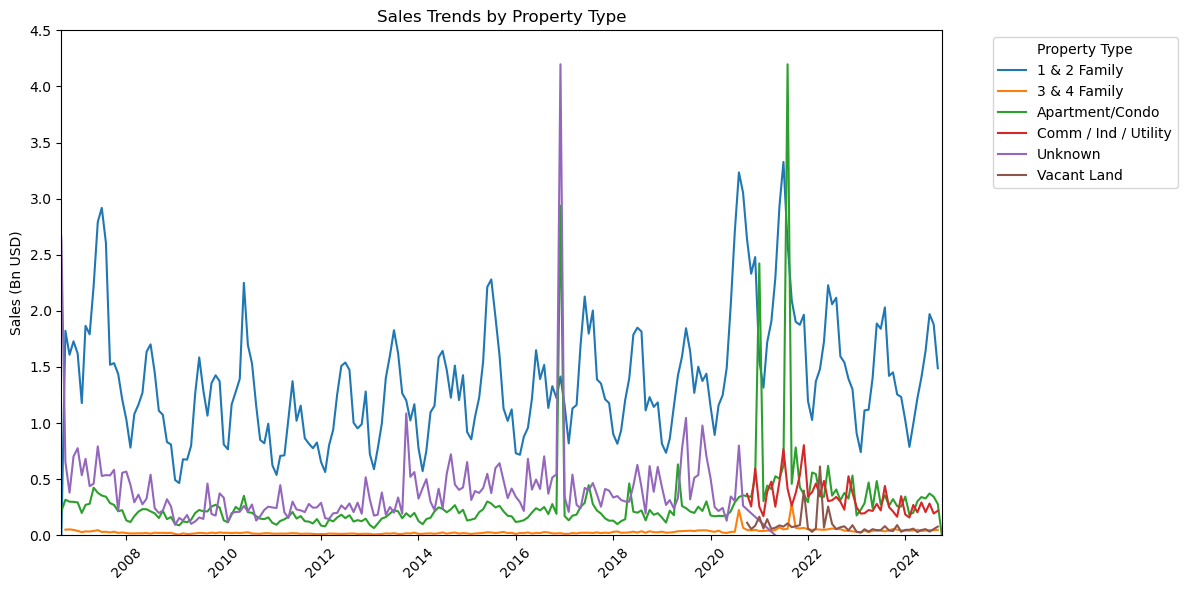

In [679]:
plt.figure(figsize=(12, 6))  # wider than default

# Winsorise for visualisation only
upper = Property_Sales_Over_Time["CPI Adjusted Sale Amount (In Billion USD)"].quantile(0.99)
Property_Sales_Over_Time["Sale Amount (In Billion USD)"] = Property_Sales_Over_Time["CPI Adjusted Sale Amount (In Billion USD)"].clip(upper=upper)
# TBD add label --> “Sales capped at 99th percentile for visual clarity”

sns.lineplot(
    data=Property_Sales_Over_Time,
    x="YearMonth",
    y="Sale Amount (In Billion USD)",
    hue="Property Type"   # <-- gives you one line per property type
)

plt.title("Sales Trends by Property Type")


plt.xlabel("")
plt.ylabel("Sales (Bn USD)")
# We note that most sales activity before Oct 2006 is unknown. This relfects poor tracking in early years. So we set an earlier x limit.   
plt.xlim(pd.to_datetime("2006-09-01"), pd.to_datetime("2024-10-01"))
plt.ylim(0,4.5)
plt.xticks(rotation=45)

# Move legend outside the plot
plt.legend(title="Property Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout so nothing is cut off

title = plt.gca().get_title().replace(" ", "_").lower()

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight")

plt.show()

### Observations

**1 & 2 Family properties consistently dominate sales value across the entire 2001–2023 period**

**Apartments/Condos and 3–4 Family properties form a stable secondary tier** 
- Their trajectories broadly mirror residential cycles, suggesting similar demand drivers (interest rates, affordability, household formation)

**Non-resi property types (Comm, Indus, Utility, Vacant Land) show limited activity prior to ~2018 followed by a noticeable increase over the last 5 years.**

This likely reflects:
- Greater investor participation post-COVID
- Increased redevelopment and land acquisition activity
- Short-term spikes observed in the unknown and non-resi series are likely driven by a small number of high-value transactions

### Q 1.3 - How have sales price trends changed over the 2001–2023 period by town?

In [620]:
df["Year"] = df["Date Recorded"].dt.to_period("Y").dt.to_timestamp()
Town_Sales_Over_Time = df.loc[:,["Year","Town","CPI Adjusted Sale Amount (In Thousands USD)"]]
Town_Sales_Over_Time["CPI Adjusted Sale Amount (In Thousands USD)"] = Town_Sales_Over_Time["CPI Adjusted Sale Amount (In Thousands USD)"]/1000000
Town_Sales_Over_Time = Town_Sales_Over_Time.rename(
    columns= {"CPI Adjusted Sale Amount (In Thousands USD)":"CPI Adjusted Sale Amount (In Billion USD)"})

In [621]:
Town_Sales_Over_Time = Town_Sales_Over_Time.groupby(by=["Town","Year"]).sum("CPI Adjusted Sale Amount (In Billion USD)").reset_index()
Town_Sales_Over_Time.head()

Town       Year  CPI Adjusted Sale Amount (In Billion USD)
0  ***Unknown*** 2007-01-01                                   0.000427
1        Andover 2002-01-01                                   0.006444
2        Andover 2003-01-01                                   0.018969
3        Andover 2004-01-01                                   0.024169
4        Andover 2005-01-01                                   0.028135

In [622]:
top_towns = (Town_Sales_Over_Time.groupby("Town")["CPI Adjusted Sale Amount (In Billion USD)"].sum().nlargest(10)).index
top_towns

Index(['Greenwich', 'Stamford', 'Norwalk', 'Westport', 'Fairfield', 'Darien',
       'New Canaan', 'Danbury', 'West Hartford', 'Bridgeport'],
      dtype='string', name='Town')

In [623]:
top_10_pct = Town_Sales_Over_Time.groupby("Town")["CPI Adjusted Sale Amount (In Billion USD)"].sum().nlargest(10).sum()/Town_Sales_Over_Time.groupby("Town")["CPI Adjusted Sale Amount (In Billion USD)"].sum().sum()
print(top_10_pct)

0.3688559601661512


In [624]:
bottom_towns = (Town_Sales_Over_Time.groupby("Town")["CPI Adjusted Sale Amount (In Billion USD)"].sum().nsmallest(5)).index
bottom_towns

Index(['***Unknown***', 'Union', 'Scotland', 'Hartland', 'Chaplin'], dtype='string', name='Town')

In [625]:
subset = Town_Sales_Over_Time[Town_Sales_Over_Time["Town"].isin(top_towns)]
subset.head()

Town       Year  CPI Adjusted Sale Amount (In Billion USD)
330  Bridgeport 2001-01-01                                   0.153763
331  Bridgeport 2002-01-01                                   0.712515
332  Bridgeport 2003-01-01                                   0.647086
333  Bridgeport 2004-01-01                                   0.331132
334  Bridgeport 2005-01-01                                   1.389050

In [626]:
pivot = subset.pivot_table(
    index="Year",
    columns="Town",
    values="CPI Adjusted Sale Amount (In Billion USD)",
    aggfunc="sum")
#pivot = pivot.reindex(columns=top_towns)
pivot.head()

Town        Bridgeport   Danbury    Darien  Fairfield  Greenwich  New Canaan  \
Year                                                                           
2001-01-01    0.153763  0.200894  0.110815        NaN   0.001169         NaN   
2002-01-01    0.712515  0.689514  0.836252   0.291529   0.640904    0.160494   
2003-01-01    0.647086  0.039923  0.697999   1.131161   2.994681    0.799802   
2004-01-01    0.331132  1.267189  0.209727   1.597407   4.529142    0.244050   
2005-01-01    1.389050  1.312214  1.273768   1.271363   3.383582    1.287356   

Town         Norwalk  Stamford  West Hartford  Westport  
Year                                                     
2001-01-01  0.266318  0.416747       0.130469  0.165076  
2002-01-01  1.350002  2.078267       0.640754  1.212098  
2003-01-01  1.046393  2.470444       0.704180  1.185757  
2004-01-01  0.480048  2.589905       0.760559  1.496936  
2005-01-01  2.248602  3.002125       0.960715  1.261764

<Figure size 1400x700 with 0 Axes>

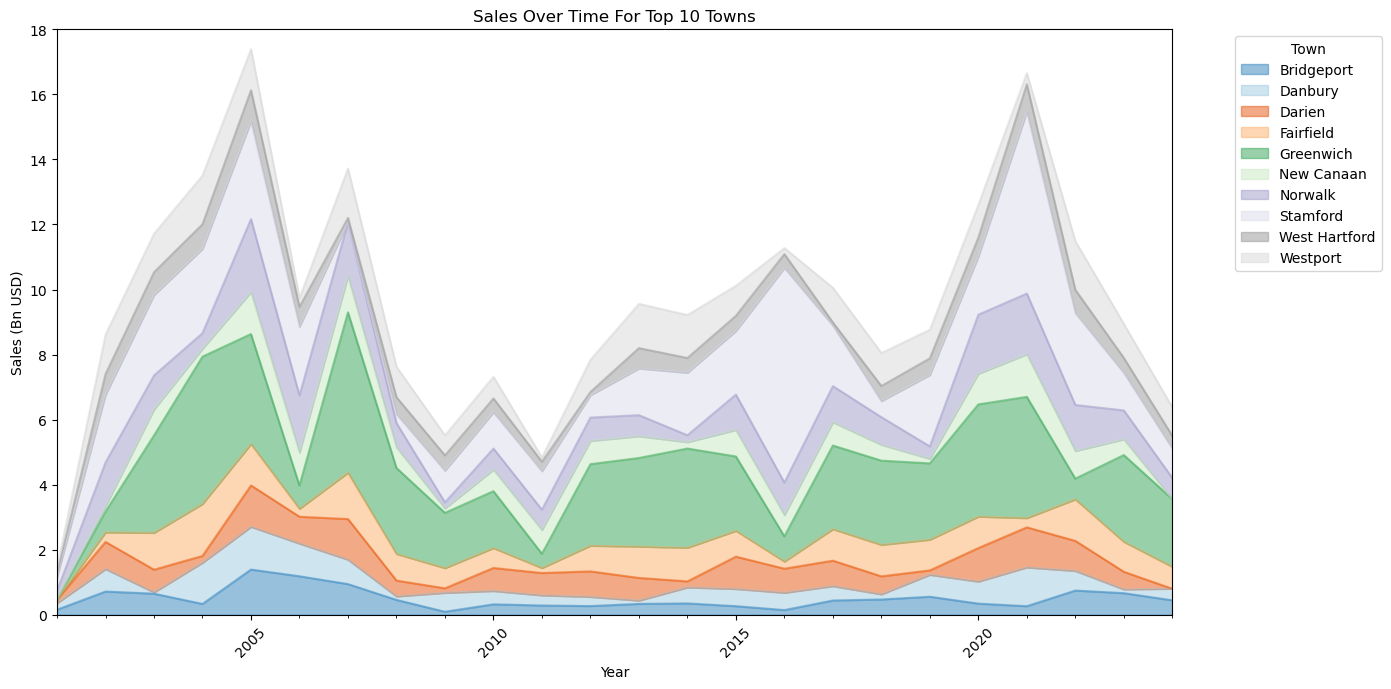

In [682]:
plt.figure(figsize=(14, 7))

pivot.plot(
    kind="area",
    alpha=0.5,
    stacked=True,
    figsize=(14,7),
    colormap= "tab20c"
)


plt.title("Sales Over Time For Top 10 Towns")
plt.xlabel("Year")
plt.ylabel("Sales (Bn USD)")
plt.ylim(0,18)
plt.xticks(rotation=45)

# Move legend outside
plt.legend(title="Town", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

title = plt.gca().get_title().replace(" ", "_").lower()

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight")

plt.show()

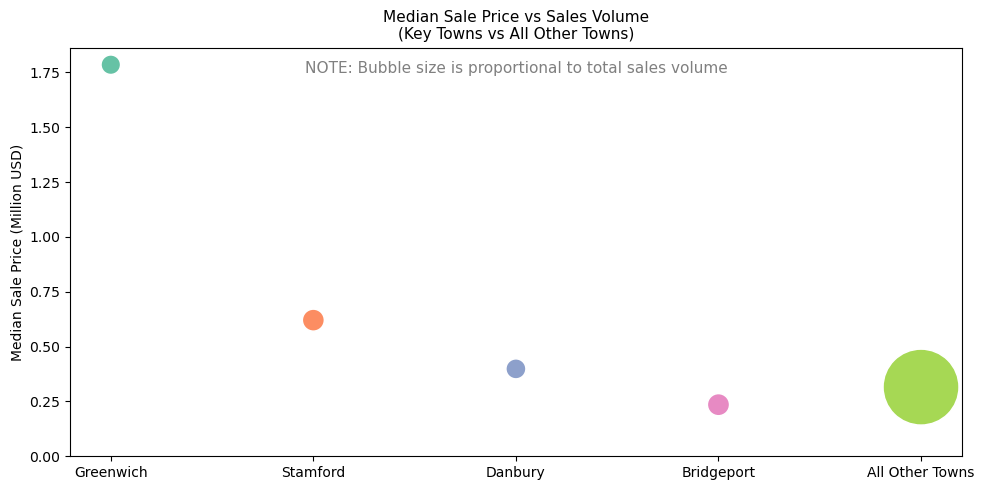

In [685]:
plt.figure(figsize=(10, 5))

ax = sns.scatterplot(
    data=summary,
    x="Town Group",
    y="median_sale_price_m",
    size="sales_volume",
    sizes=(200, 3000),
    hue="Town Group",
    palette="Set2",
    legend=False
)

# Title
plt.title(
    "Median Sale Price vs Sales Volume\n(Key Towns vs All Other Towns)",
    fontsize=11,
    #pad=20
)

# NOTE under title
plt.text(
    0.5, 0.93,
    "NOTE: Bubble size is proportional to total sales volume",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
    fontsize=11,
    color="gray"
)

plt.ylabel("Median Sale Price (Million USD)")
plt.xlabel("")
plt.ylim(bottom=0)

plt.savefig(
    f"{output_dir}/Median_sales_by_town.png",
    dpi=300,
    bbox_inches="tight")

plt.tight_layout()
plt.show()

### Observations

**The top 10 towns collectively account for ~37% of total sales value**
- Sales are heavily concentrated in affluent, high-value markets such as Greenwich, Darien, Westport, and Stamford.
- This reflects persistent demand for premium residential living.
  
**Greenwich consistently leads sales, driven by high-value transactions rather than volume alone**
Its sales values remain resilient across cycles Appeal comes from:
 - Proximity to NYC
 - A luxury housing market
 - Strong demand from high-income buyers

**Bridgeport and Danbury show relative contraction, reflecting structural differences in local markets**
- Unlike Greenwich, Bridgeport and Danbury rely more on volume than high per-sale value, and are more sensitive to:
   - Economic cycles
   - Affordability constraints
   - Local employment trends

**Over time, this results in flatter or declining sales value trends, even when statewide sales rise. This divergence highlights how Connecticut’s housing recovery and COVID-era boom were unevenly distributed, benefiting high-income commuter towns more than mid-market urban centres**


### Q 1.4 - Seasonality Trends?

In [629]:
df["Month"] = df["Date Recorded"].dt.month
df.head()

Date Recorded        Town             Address  Assessed Value (USD)  \
906649    1999-04-05  New London  184 PEQUOT AVE 309               46690.0   
927135    2001-08-01     Shelton    19 BLACKBERRY LA              390810.0   
930890    2001-08-23     Shelton   12 BOYSENBERRY LA              427910.0   
440752    2001-09-04   Newington       110 MOYLAN CT               64750.0   
480759    2001-09-05   Newington     48 EVERGREEN RD              166110.0   

        Sale Amount (USD)    Property Type  % Profit on Sale       Year  \
906649            95000.0  Apartment/Condo        103.469704 1999-01-01   
927135           635000.0     1 & 2 Family         62.483047 2001-01-01   
930890           558000.0     1 & 2 Family         30.401253 2001-01-01   
440752            88000.0  Apartment/Condo         35.907341 2001-01-01   
480759           256000.0     1 & 2 Family         54.114746 2001-01-01   

        US City Average CPI  CPI Adjusted Assessed Value (In Thousands USD)  \
906649              166.583                                       87.923495   
927135              177.042                                      692.470235   
930890              177.042                                      758.207155   
440752              177.042                                      114.729530   
480759              177.042                                      294.327757   

        CPI Adjusted Sale Amount (In Thousands USD)  YearMonth  \
906649                                   178.897667 1999-04-01   
927135                                  1125.146745 2001-08-01   
930890                                   988.711628 2001-08-01   
440752                                   155.925848 2001-09-01   
480759                                   453.602467 2001-09-01   

        CPI Adjusted Sale Amount (In Thousands USD)_iqr_outlier  \
906649                                              False         
927135                                               True         
930890                                              False         
440752                                              False         
480759                                              False         

        CPI Adjusted Assessed Value (In Thousands USD)_iqr_outlier  Month  
906649                                              False               4  
927135                                               True               8  
930890                                               True               8  
440752                                              False               9  
480759                                              False               9

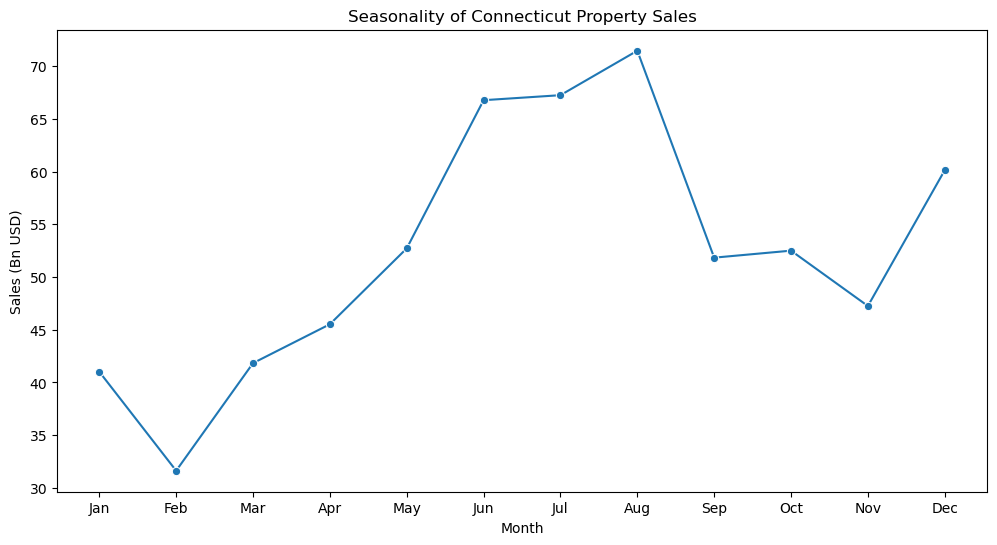

In [686]:
Seasonality = df.groupby("Month").sum("CPI Adjusted Sale Amount (In Thousands USD)").reset_index()
Seasonality = Seasonality.loc[:,["Month","CPI Adjusted Sale Amount (In Thousands USD)"]]

Seasonality["CPI Adjusted Sale Amount (In Thousands USD)"] = Seasonality["CPI Adjusted Sale Amount (In Thousands USD)"]/1000000
Seasonality = Seasonality.rename(
    columns = {"CPI Adjusted Sale Amount (In Thousands USD)":"CPI Adjusted Sale Amount (In Billions USD)"})

plt.figure(figsize=(12,6))
sns.lineplot(data = Seasonality, x="Month", y="CPI Adjusted Sale Amount (In Billions USD)", marker="o")
plt.title("Seasonality of Connecticut Property Sales")
plt.ylabel("Sales (Bn USD)")
plt.xticks(ticks=range(1,13), labels=["Jan","Feb","Mar","Apr","May","Jun",
                                       "Jul","Aug","Sep","Oct","Nov","Dec"])

title = plt.gca().get_title().replace(" ", "_").lower()

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight")

plt.show()

### Observations 

**Sales activity shows a strong annual cycle with spring–summer peaks and winter troughs**
- Buyers and sellers are more active during warmer months, partly due to household moves timed around school calendars and weather considerations.
- Winter months, particularly December through February, often see lower sales, fewer listings, and slower market activity—consistent with historical market cycles.
- Well documented in broader US market [https://arxiv.org/abs/2511.10808?].

 
**Winter seasonal slowdowns are pronounced, often decoupled from broader price trends**

- This underscores that seasonality affects volume more than price.
- Volume dips more steeply in winter months, whereas prices often remain high or decline modestly compared with volume swings.
  

### Question 2.1 How does sale price vary with assessed value?

In [631]:
df["Resi vs Comm vs Other"] = df["Property Type"].replace({
    "Apartment/Condo": "Resi",
    "1 & 2 Family": "Resi",
    "3 & 4 Family": "Resi",
    "Vacant Land": "Other",
    "Comm / Ind / Utility": "Commercial",   
    "Unknown": "Other"})

In [632]:
df.head()
Sales_vs_Value = df.loc[:,["Property Type","Resi vs Comm vs Other","CPI Adjusted Assessed Value (In Thousands USD)","CPI Adjusted Sale Amount (In Thousands USD)"]].reset_index().iloc[:,1:]
Sales_vs_Value.columns = ["Property Type","Resi vs Comm vs Other","Assessed Value", "Sale Amount"]
Sales_vs_Value.head(5)

Property Type Resi vs Comm vs Other  Assessed Value  Sale Amount
0  Apartment/Condo                  Resi       87.923495   178.897667
1     1 & 2 Family                  Resi      692.470235  1125.146745
2     1 & 2 Family                  Resi      758.207155   988.711628
3  Apartment/Condo                  Resi      114.729530   155.925848
4     1 & 2 Family                  Resi      294.327757   453.602467

In [633]:
Sales_vs_Value.iloc[:,2:].corr()

Assessed Value  Sale Amount
Assessed Value        1.000000     0.140844
Sale Amount           0.140844     1.000000

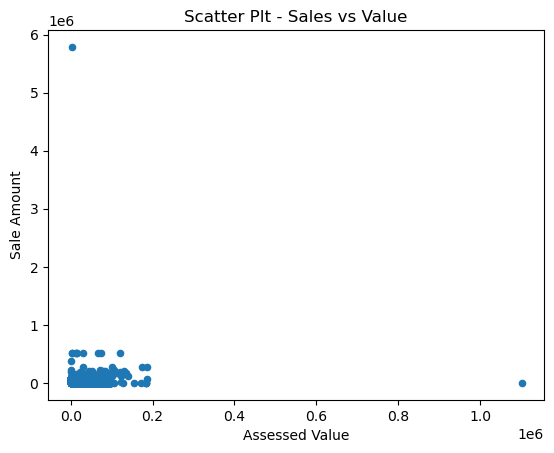

In [634]:
Sales_vs_Value.plot(kind="scatter", x= "Assessed Value", y="Sale Amount")

plt.title("Scatter Plt - Sales vs Value")
title = plt.gca().get_title().replace(" ", "_").lower()

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight")


plt.show()

In [635]:
#Sales_vs_Value.iloc[:,1:].corr()

In [636]:
df["Resi vs Comm vs Other"].unique()

<StringArray>
['Resi', 'Other', 'Commercial']
Length: 3, dtype: string

In [637]:
# Add justification for log transformation
Sales_vs_Value["log_value"] = np.log1p(Sales_vs_Value["Assessed Value"])
Sales_vs_Value["log_sales"] = np.log1p(Sales_vs_Value["Sale Amount"])

plot_df = Sales_vs_Value.replace([np.inf, -np.inf], np.nan).dropna(subset=["log_value", "log_sales"])

plot_df["Property Type"] = plot_df["Property Type"].astype("category")
plot_df["Resi vs Comm vs Other"] = plot_df["Resi vs Comm vs Other"].astype("category")

In [638]:
Sales_vs_Value.head()

Property Type Resi vs Comm vs Other  Assessed Value  Sale Amount  \
0  Apartment/Condo                  Resi       87.923495   178.897667   
1     1 & 2 Family                  Resi      692.470235  1125.146745   
2     1 & 2 Family                  Resi      758.207155   988.711628   
3  Apartment/Condo                  Resi      114.729530   155.925848   
4     1 & 2 Family                  Resi      294.327757   453.602467   

   log_value  log_sales  
0   4.487776   5.192388  
1   6.541708   7.026557  
2   6.632275   6.897414  
3   4.751256   5.055773  
4   5.688086   6.119423

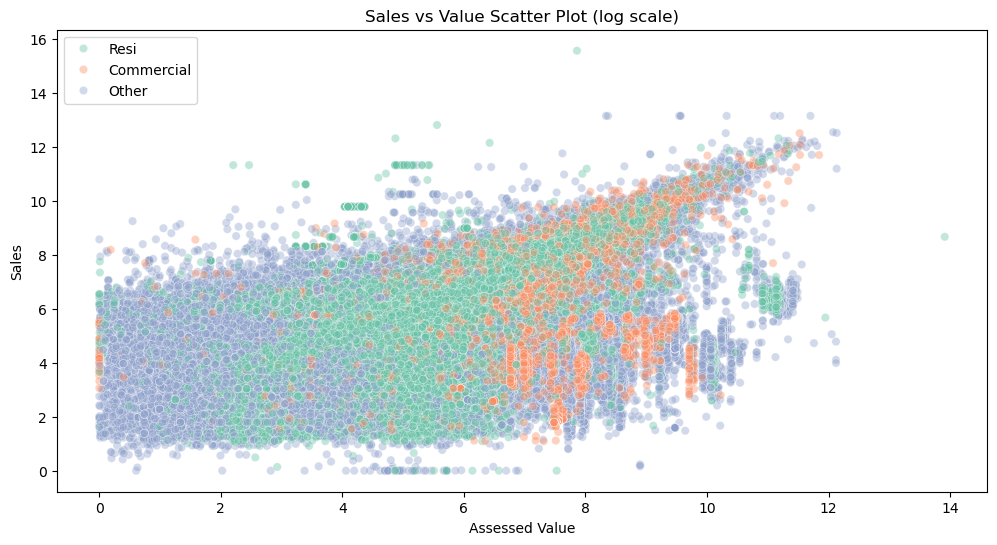

In [688]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=plot_df,
    x="log_value",
    y="log_sales",
    hue="Resi vs Comm vs Other",
    hue_order=["Resi", "Commercial", "Other"],
    alpha=0.4,
    palette="Set2",
    legend="brief"
)

plt.legend(loc="upper left")

plt.title("Sales vs Value Scatter Plot (log scale)")
title = plt.gca().get_title().replace(" ", "_").lower()

plt.xlabel("Assessed Value")
plt.ylabel("Sales")

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight")

plt.show()

In [640]:
print(f"Correlation: {Sales_vs_Value.loc[:,["log_value", "log_sales"]].corr().iloc[0,1]}")
# Sales_vs_Value.head()
#print(f"Correlation: {Sales_vs_Value.loc[:,["Assessed Value", "Sale Amount"]].corr().iloc[0,1]}")

Correlation: 0.7071596889403208


**A log scale was used**
- Using a log scale linearises the multiplicative relationship between Assessed Value and Sale Amount.
- Log scaling mitigates the influence of extreme, high-value transactions.
- On the raw scale, these observations compress the majority of transactions near the origin and obscure any meaningful pattern.

### Observations

**Strong positive Correlation of 0.71. About 55% (0.74²) of the variation in log sale prices is explained by log assessed values**

**Residential properties show the tightest clustering around the trend line**
- Assessments are a relatively good predictor of market values. 
- This reflects more standardised valuation methods, higher transaction frequency, and more homogeneous property characteristics in the resi market.

**Commercial and “Other” properties exhibit greater dispersion**
- Assessments are a weaker predictor of market values.
- This indicates that sale prices are more sensitive to other factors (deal structure, zoning and redevelopment options)


### Question 2.2 Does property type influence the % Profit on Sale?

In [689]:
df.columns

Index(['Date Recorded', 'Town', 'Address', 'Assessed Value (USD)',
       'Sale Amount (USD)', 'Property Type', '% Profit on Sale', 'Year',
       'US City Average CPI', 'CPI Adjusted Assessed Value (In Thousands USD)',
       'CPI Adjusted Sale Amount (In Thousands USD)', 'YearMonth',
       'CPI Adjusted Sale Amount (In Thousands USD)_iqr_outlier',
       'CPI Adjusted Assessed Value (In Thousands USD)_iqr_outlier', 'Month',
       'Resi vs Comm vs Other'],
      dtype='object')

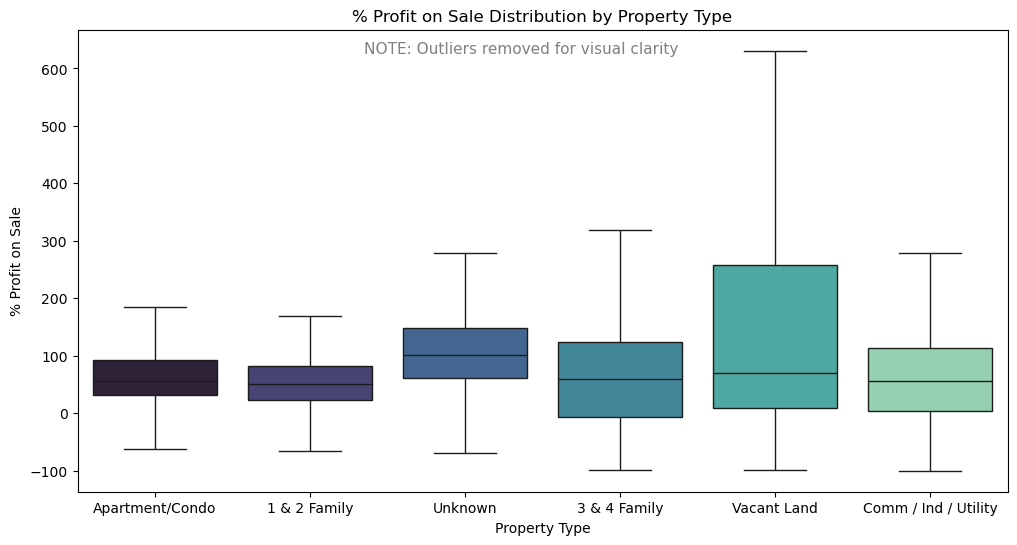

In [691]:
plt.figure(figsize=(12, 6))

palette = sns.color_palette("mako", n_colors=df["Property Type"].nunique())

sns.boxplot(
    data=df,
    x="Property Type",
    y="% Profit on Sale",
    showfliers=False,
    hue ="Property Type",
    legend = False, 
    palette=palette
    #"crest"
)

plt.title("% Profit on Sale Distribution by Property Type")

plt.text(
    0.5, 1.1,s= "NOTE: Outliers removed for visual clarity",
    ha="center",
    va="bottom",
    transform=ax.transAxes,
    fontsize=11,
    color="gray"
)

title = plt.gca().get_title().replace(" ", "_").lower()

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight")

plt.show()

### Observations

**Removing fliers highlights structural differences rather than rare extreme events**
- Excluding outliers ensures that the visual comparison focuses on typical transaction outcomes rather than being dominated by a small number of unusually large gains or losses.

**Residential properties exhibit tighter and more symmetric profit distributions**
- After removing extreme outliers, residential properties show a relatively narrow interquartile range, with median profit margins being modestly positive (~50-70%).
- This suggests strong price discovery and competitive pricing in high-volume housing markets.

**Commercial and “Other” property types display wider dispersion and higher upside variability**
- Even with fliers removed, commercial and other non-resi property types exhibit broader profit distributions. 
- This reflects the heterogeneity of these assets, where sale outcomes depend on other factors  as seen before (redevelopment potential, income streams, zoning changes)

In [643]:
#df.sort_values(by="% Profit on Sale",ascending=False).head(20)
# df[df["% Profit on Sale"]>600]

### Q3 Which towns or regions have the highest sale price over the years?

In [677]:
df.columns
#Town_Sales_Over_Time.columns

Index(['Date Recorded', 'Town', 'Address', 'Assessed Value (USD)',
       'Sale Amount (USD)', 'Property Type', '% Profit on Sale', 'Year',
       'US City Average CPI', 'CPI Adjusted Assessed Value (In Thousands USD)',
       'CPI Adjusted Sale Amount (In Thousands USD)', 'YearMonth',
       'CPI Adjusted Sale Amount (In Thousands USD)_iqr_outlier',
       'CPI Adjusted Assessed Value (In Thousands USD)_iqr_outlier', 'Month',
       'Resi vs Comm vs Other'],
      dtype='object')

In [645]:
#Town_Sales_Over_Time.head()
Town_Sales_Over_Time = Town_Sales_Over_Time.sort_values("Year")
Town_Sales_Over_Time.head()
# Average_Sales_By_Town = df.groupby("Town").mean("CPI Adjusted Sale Amount (In Thousands USD)").reset_index()
Median_Sales_By_Town = df.groupby("Town").median("CPI Adjusted Sale Amount (In Thousands USD)").reset_index()
Median_Sales_By_Town = Median_Sales_By_Town.loc[:,["Town", "CPI Adjusted Sale Amount (In Thousands USD)"]]
Median_Sales_By_Town["CPI Adjusted Sale Amount (In Thousands USD)"] = Median_Sales_By_Town["CPI Adjusted Sale Amount (In Thousands USD)"]/1000 
Median_Sales_By_Town.columns = ["Town", "Median Sale Value (Million USD)"]
Median_Sales_By_Town.head()

Town  Median Sale Value (Million USD)
0  ***Unknown***                         0.427328
1        Andover                         0.301896
2        Ansonia                         0.277958
3        Ashford                         0.237366
4           Avon                         0.497056

In [646]:
# Winsorise for visualisation only
town_upper = Median_Sales_By_Town["Median Sale Value (Million USD)"].quantile(0.99)
Median_Sales_By_Town["Median Sale Value (Million USD)"] = Median_Sales_By_Town["Median Sale Value (Million USD)"].clip(upper=town_upper)
# TBD add label --> “Sales capped at 99th percentile for visual clarity”


In [647]:
# !pip install folium 
import folium
import json

In [648]:
CT = folium.Map(tiles=None)

In [649]:

# Create base map (no tile)
CT = folium.Map(
    location=[41.6, -72.7],
    tiles= None,
    #"CartoDB positron",
    zoom_start=8)

CT.get_root().html.add_child(folium.Element("""
<style>
.leaflet-container {
    background: white !important;
}
</style>
"""))

In [650]:

# Load geojson
with open("ct-towns-2021-datactgov.geojson") as f:
    ct_geo = json.load(f)

# Fit map to Connecticut bounds
folium.GeoJson(
    ct_geo,
    name="CT Towns",
    style_function=lambda x: {"fillOpacity": 0, "weight": 0}
).add_to(CT)

CT.fit_bounds(
    folium.GeoJson(ct_geo).get_bounds()
)

# Add choropleth
folium.Choropleth(
    geo_data=ct_geo,
    data=Median_Sales_By_Town,
    columns=["Town", "Median Sale Value (Million USD)"],
    key_on="feature.properties.town",
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.3,
    nan_fill_color="lightgray",
    #legend_name= None
    legend_name="Median Sale Value (Million USD)"
    
).add_to(CT)


folium.GeoJson(
    ct_geo,
    style_function=lambda x: {
        "fillOpacity": 0,
        "color": "black",
        "weight": 0.3}).add_to(CT)


In [651]:
!pip install shapely

In [652]:
import shapely.geometry as geom

# Top 5 towns
top5 = (
    Median_Sales_By_Town
    .sort_values("Median Sale Value (Million USD)", ascending=False)
    .head(5)
)

# Compute town centroids
town_centroids = {}
for feature in ct_geo["features"]:
    town_name = feature["properties"]["town"]
    shape = geom.shape(feature["geometry"])
    centroid = shape.centroid
    town_centroids[town_name] = (centroid.y, centroid.x)

# Add labelled callouts with arrows
for _, row in top5.iterrows():
    town = row["Town"]
    value = row["Median Sale Value (Million USD)"]

    if town in town_centroids:
        lat, lon = town_centroids[town]

        # Custom offsets
        if town in ["Westport"]:
            lat = lat - 0.01
            label_lat = lat
            label_lon = lon + 0.90
            
        
        elif town in["Darien"]:
            lat = lat + 0.005
            label_lat = lat
            label_lon = lon + 0.90
        
        else:
            label_lat = lat
            label_lon = lon + 0.70

        # Arrow / leader line
        folium.PolyLine(
            locations=[(label_lat, label_lon -0.05), (lat, lon)],
            color="black",
            weight=1,
            opacity=0.8
        ).add_to(CT)

        # Text-only label
        folium.Marker(
            location=[label_lat, label_lon],
            icon=folium.DivIcon(
                html=f"""
                <div style="
                    font-size: 11px;
                    font-weight: bold;
                    color: black;
                    white-space: nowrap;
                ">
                    {town} - ${value:.1f}m
                </div>
                """
            )

        ).add_to(CT)

In [692]:
CT.save("Pictures/1.EDA Figures/CT_filled_map")
CT

### Observations

**Southwestern Connecticut clearly dominates median sale prices**

- Towns in Fairfield County (Greenwich, Darien, New Canaan, Westport, Weston) have the highest median sale values, clustered around $1.5–$1.7m.
- These towns are part of the **NYC commuter belt**, with direct rail access to Manhattan via Metro-North.
- They are consistently ranked among the wealthiest towns in the US by median household income and net worth.

High demand is driven by:
- Finance and professional services employment
- Limited housing supply due to zoning restrictions
- Strong school districts and amenities

**Price gradients weaken rapidly moving inland**
- Median sale values drop sharply moving north and east away from Fairfield County.
- Much of central and eastern Connecticut shows sub-$700k medians, with many towns closer to $400–600k.

Inland towns are:
- Less connected to NYC labor markets
- More dependent on local or regional employment
- Eastern Connecticut has historically experienced slower population and income growth, particularly post-manufacturing decline.

### Q4 How do median household income, education levels, or poverty rates correlate with prices and sales activity?

In [678]:
# Household_Income 
# Population
# Education
# Poverty_Status

In [655]:
Household_Income = Household_Income.rename({"Value":"Median Household Income"},axis=1)
Household_Income.head()

Town  Median Household Income  Margin of Error
10      Andover                   127335          20643.0
67      Ansonia                    80585           8385.0
74      Ashford                   129219          34182.0
11         Avon                   151481          10085.0
95  Barkhamsted                   119255          10168.0

In [656]:
Education["% Less Than High School Diploma"] = Education["% Less Than High School Diploma"]/100
Education["% More Than High School Diploma"] = 1 - Education["% Less Than High School Diploma"]
Education.head()
Education_2013 = Education[Education["Year"]== 2023]

In [657]:
Population.head()

Year    Town  Population in 000s
0  2010  Bethel               0.011
1  2010  Bethel               0.005
2  2010  Bethel               0.000
3  2010  Bethel               0.010
4  2010  Bethel               0.000

In [658]:
income_cols = ["Town", "Median Household Income"]
edu_cols = ["Town", "% More Than High School Diploma"]
poverty_cols = ["Town", "% Under Poverty Line"]

df_merged = (
    df
    .merge(Household_Income[income_cols], on="Town", how="left")
    .merge(Education[edu_cols], on="Town", how="left")
    .merge(Poverty_Status[poverty_cols], on="Town", how="left"))

In [659]:
df.head()

Date Recorded        Town             Address  Assessed Value (USD)  \
906649    1999-04-05  New London  184 PEQUOT AVE 309               46690.0   
927135    2001-08-01     Shelton    19 BLACKBERRY LA              390810.0   
930890    2001-08-23     Shelton   12 BOYSENBERRY LA              427910.0   
440752    2001-09-04   Newington       110 MOYLAN CT               64750.0   
480759    2001-09-05   Newington     48 EVERGREEN RD              166110.0   

        Sale Amount (USD)    Property Type  % Profit on Sale       Year  \
906649            95000.0  Apartment/Condo        103.469704 1999-01-01   
927135           635000.0     1 & 2 Family         62.483047 2001-01-01   
930890           558000.0     1 & 2 Family         30.401253 2001-01-01   
440752            88000.0  Apartment/Condo         35.907341 2001-01-01   
480759           256000.0     1 & 2 Family         54.114746 2001-01-01   

        US City Average CPI  CPI Adjusted Assessed Value (In Thousands USD)  \
906649              166.583                                       87.923495   
927135              177.042                                      692.470235   
930890              177.042                                      758.207155   
440752              177.042                                      114.729530   
480759              177.042                                      294.327757   

        CPI Adjusted Sale Amount (In Thousands USD)  YearMonth  \
906649                                   178.897667 1999-04-01   
927135                                  1125.146745 2001-08-01   
930890                                   988.711628 2001-08-01   
440752                                   155.925848 2001-09-01   
480759                                   453.602467 2001-09-01   

        CPI Adjusted Sale Amount (In Thousands USD)_iqr_outlier  \
906649                                              False         
927135                                               True         
930890                                              False         
440752                                              False         
480759                                              False         

        CPI Adjusted Assessed Value (In Thousands USD)_iqr_outlier  Month  \
906649                                              False               4   
927135                                               True               8   
930890                                               True               8   
440752                                              False               9   
480759                                              False               9   

       Resi vs Comm vs Other  
906649                  Resi  
927135                  Resi  
930890                  Resi  
440752                  Resi  
480759                  Resi

In [660]:
corr =df_merged.loc[:,["CPI Adjusted Sale Amount (In Thousands USD)","CPI Adjusted Assessed Value (In Thousands USD)","% Profit on Sale","Median Household Income",
                 "% More Than High School Diploma","% Under Poverty Line"]].corr()



In [661]:
corr.columns = ["Sale Amount", "Assessed Value","% Profit on Sale","Median Household Income", "% More Than High School Diploma","% Under Poverty Line"]
corr.index = ["Sale Amount", "Assessed Value","% Profit on Sale","Median Household Income", "% More Than High School Diploma","% Under Poverty Line"]
corr.head()


Sale Amount  Assessed Value  \
Sale Amount                         1.000000        0.140844   
Assessed Value                      0.140844        1.000000   
% Profit on Sale                    0.001370       -0.000510   
Median Household Income             0.053823        0.115954   
% More Than High School Diploma     0.024553        0.043027   

                                 % Profit on Sale  Median Household Income  \
Sale Amount                              0.001370                 0.053823   
Assessed Value                          -0.000510                 0.115954   
% Profit on Sale                         1.000000                -0.000434   
Median Household Income                 -0.000434                 1.000000   
% More Than High School Diploma          0.000725                 0.725700   

                                 % More Than High School Diploma  \
Sale Amount                                             0.024553   
Assessed Value                                          0.043027   
% Profit on Sale                                        0.000725   
Median Household Income                                 0.725700   
% More Than High School Diploma                         1.000000   

                                 % Under Poverty Line  
Sale Amount                                 -0.020482  
Assessed Value                              -0.038349  
% Profit on Sale                             0.000576  
Median Household Income                     -0.708832  
% More Than High School Diploma             -0.860666

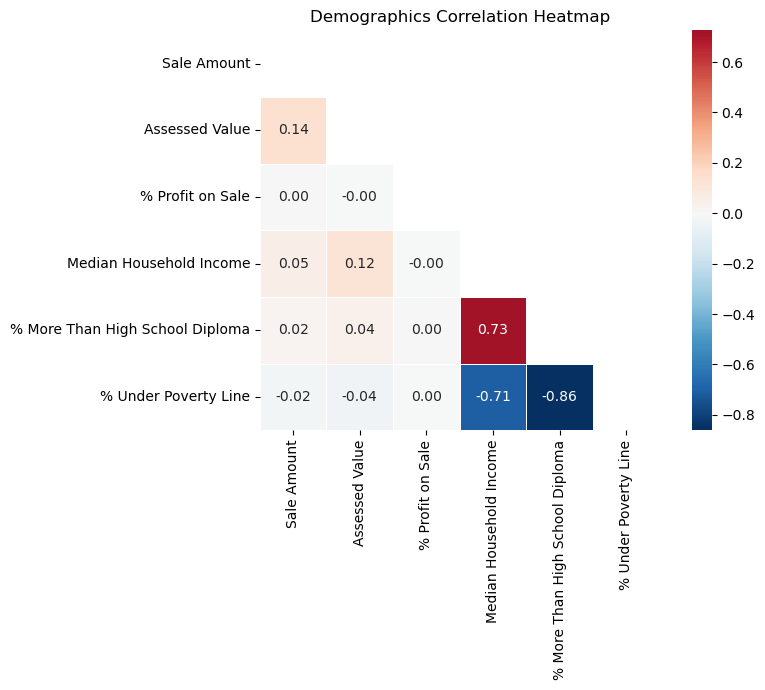

In [662]:

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(9, 7))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    square=True
)

plt.title("Demographics Correlation Heatmap")
plt.tight_layout()

title = plt.gca().get_title().replace(" ", "_").lower()

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight")

plt.show()


### Observations

**Socioeconomic variables show only weak linear relationships with sale outcomes**
- Median household income, education level, and poverty rate all exhibit very weak correlations (|r| < 0.15) with sales ratios or sale values.
- No socioeconomic variable shows a strong linear association at the town level.
- This suggests that town-level socioeconomic averages explain little of the variation in individual property sale outcomes.
- Property prices are more strongly driven by: Property-specific characteristics (size, location within town, quality) & Market dynamics

**As expected income and education are highly correlated**

**Sales ratio behaves differently from absolute sale values**
- Sales Ratio Calculated shows zero / near zero correlations with socioeconomic variables compared to absolute sale values.
- Assessments may already partially account for local income differences.
- Deviations from assessed values are driven more by market dynamics.

### Q5 How did COVID-19 pandemic years affect sale prices and volumes in Connecticut?

In [663]:
COVID_DATA =pd.read_csv("COVID-19_State_Level_Data.csv")
COVID_DATA.head()

report_date cumulative_cases cumulative_cases_confirmed  \
0  06/01/2023          983,652                    868,727   
1  05/31/2023          983,562                    868,679   
2  05/30/2023          983,477                    868,648   
3  05/29/2023          983,463                    868,634   
4  05/28/2023          983,441                    868,613   

  cumulative_cases_probable cumulative_tests_reportable cumulative_deaths  \
0                   114,925                  18,367,421            12,354   
1                   114,883                  18,366,631            12,348   
2                   114,829                  18,366,151            12,348   
3                   114,829                  18,366,000            12,348   
4                   114,828                  18,365,795            12,348   

  cases_7days confirmed_cases_7days  probable_cases_7days  \
0         280                   173                   107   
1         246                   159                    87   
2         223                   175                    48   
3         284                   206                    78   
4         307                   207                   100   

  tests_reportable_7days  ...  cumulative_deaths_hisp_race_NH Black  \
0                  2,435  ...                                 1,320   
1                  2,116  ...                                 1,320   
2                  2,176  ...                                 1,320   
3                  2,624  ...                                 1,320   
4                  2,738  ...                                 1,320   

  cumulative_deaths_hisp_race_NH Multiracial  \
0                                        305   
1                                        305   
2                                        305   
3                                        305   
4                                        305   

  cumulative_deaths_hisp_race_NH White  cumulative_deaths_hisp_race_Unknown  \
0                                9,036                                  337   
1                                9,030                                  337   
2                                9,030                                  337   
3                                9,030                                  337   
4                                9,030                                  337   

  cumulative_deaths_gender_Female cumulative_deaths_gender_Male  \
0                           6,053                         6,288   
1                           6,049                         6,286   
2                           6,049                         6,286   
3                           6,049                         6,286   
4                           6,049                         6,286   

  cumulative_deaths_gender_Other  cumulative_deaths_gender_Unknown  fips  \
0                              1                                12     9   
1                              1                                12     9   
2                              1                                12     9   
3                              1                                12     9   
4                              1                                12     9   

   data_updated  
0    06/01/2023  
1    05/31/2023  
2    05/30/2023  
3    05/29/2023  
4    05/28/2023  

[5 rows x 94 columns]

In [664]:
# Convert to datetime
COVID_DATA["report_date"] = pd.to_datetime(COVID_DATA["report_date"], errors="coerce")

# Handle commas, Convert from object to float
covid_numeric_cols = [
    "cumulative_cases",
    "cumulative_deaths",
    "cases_7days",
    "tests_reportable_7days"]

for col in covid_numeric_cols:
    COVID_DATA[col] = (
        COVID_DATA[col]
        .astype(str)
        .str.replace(",", "")
        .astype(float))

COVID_DATA = COVID_DATA.sort_values("report_date")

In [665]:
# cases_7days & tests_reportable_7days, These reflect current disease pressure.
COVID_DATA.head()

report_date  cumulative_cases cumulative_cases_confirmed  \
342  2022-06-21          822898.0                    736,988   
341  2022-06-22          823625.0                    737,598   
340  2022-06-23          824295.0                    738,168   
339  2022-06-24          825075.0                    738,855   
338  2022-06-25          825732.0                    739,452   

    cumulative_cases_probable cumulative_tests_reportable  cumulative_deaths  \
342                    85,910                  16,524,984            11032.0   
341                    86,027                  16,533,449            11033.0   
340                    86,127                  16,542,253            11034.0   
339                    86,220                  16,552,195            11034.0   
338                    86,280                  16,563,480            11034.0   

     cases_7days confirmed_cases_7days  probable_cases_7days  \
342       3254.0                 2,731                   523   
341       3315.0                 2,775                   540   
340       3264.0                 2,751                   513   
339       3511.0                 2,953                   558   
338       3599.0                 3,053                   546   

     tests_reportable_7days  ...  cumulative_deaths_hisp_race_NH Black  \
342                 44854.0  ...                                 1,261   
341                 43523.0  ...                                 1,261   
340                 42582.0  ...                                 1,261   
339                 43973.0  ...                                 1,261   
338                 47293.0  ...                                 1,261   

    cumulative_deaths_hisp_race_NH Multiracial  \
342                                        275   
341                                        275   
340                                        275   
339                                        275   
338                                        275   

    cumulative_deaths_hisp_race_NH White  cumulative_deaths_hisp_race_Unknown  \
342                                7,951                                  285   
341                                7,952                                  285   
340                                7,953                                  285   
339                                7,953                                  285   
338                                7,953                                  285   

    cumulative_deaths_gender_Female cumulative_deaths_gender_Male  \
342                           5,397                         5,624   
341                           5,397                         5,625   
340                           5,397                         5,626   
339                           5,397                         5,626   
338                           5,397                         5,626   

    cumulative_deaths_gender_Other  cumulative_deaths_gender_Unknown  fips  \
342                              1                                10     9   
341                              1                                10     9   
340                              1                                10     9   
339                              1                                10     9   
338                              1                                10     9   

     data_updated  
342    06/21/2022  
341    06/22/2022  
340    06/23/2022  
339    06/24/2022  
338    06/25/2022  

[5 rows x 94 columns]

In [666]:
COVID_DATA["YearMonth"] = COVID_DATA["report_date"].dt.to_period("M")
COVID_DATA["new_cases"] = (COVID_DATA["cumulative_cases"].diff().clip(lower=0))

covid_monthly = (
    COVID_DATA
    .groupby("YearMonth")
    .agg(
        avg_cases_7day=("cases_7days", "mean"),
        avg_tests_7day=("tests_reportable_7days", "mean"),
        total_new_cases=("new_cases", "sum")
    )
    .reset_index()
)

In [667]:
covid_monthly.dtypes

YearMonth          period[M]
avg_cases_7day       float64
avg_tests_7day       float64
total_new_cases      float64
dtype: object

In [668]:
sales_monthly = (
    df
    .groupby("YearMonth")
    .agg(
        sales_volume=("CPI Adjusted Sale Amount (In Thousands USD)", "count"),
        sales_value=("CPI Adjusted Sale Amount (In Thousands USD)", "sum")
    )
    .reset_index())

In [669]:
# sales_monthly["YearMonth"]
sales_monthly["YearMonth"] = sales_monthly["YearMonth"].dt.to_period("M")
sales_monthly.dtypes
# sales_monthly.tail()

YearMonth       period[M]
sales_volume        int64
sales_value       float64
dtype: object

In [670]:
combined_df = sales_monthly.merge(covid_monthly, on="YearMonth", how="left")
combined_df["sales_value"] = combined_df["sales_value"]/1000000

In [671]:
# combined_df
combined_df.dtypes
combined_df.describe()
combined_df.dtypes

YearMonth          period[M]
sales_volume           int64
sales_value          float64
avg_cases_7day       float64
avg_tests_7day       float64
total_new_cases      float64
dtype: object

In [672]:
combined_df["YearMonth_dt"] = combined_df["YearMonth"].dt.to_timestamp()
combined_df.dtypes

YearMonth               period[M]
sales_volume                int64
sales_value               float64
avg_cases_7day            float64
avg_tests_7day            float64
total_new_cases           float64
YearMonth_dt       datetime64[ns]
dtype: object

In [673]:
combined_df = combined_df.rename(columns = {"sales_volume":"Sales Volume","sales_value":"Sales Value (bn USD)"})
combined_df = combined_df[combined_df["YearMonth_dt"]>pd.to_datetime("2015-01-01")]

In [674]:
combined_df.head()

YearMonth  Sales Volume  Sales Value (bn USD)  avg_cases_7day  \
163   2015-02          2520              1.322010             NaN   
164   2015-03          3260              1.614926             NaN   
165   2015-04          3568              1.826796             NaN   
166   2015-05          4051              2.221387             NaN   
167   2015-06          5472              3.087851             NaN   

     avg_tests_7day  total_new_cases YearMonth_dt  
163             NaN              NaN   2015-02-01  
164             NaN              NaN   2015-03-01  
165             NaN              NaN   2015-04-01  
166             NaN              NaN   2015-05-01  
167             NaN              NaN   2015-06-01

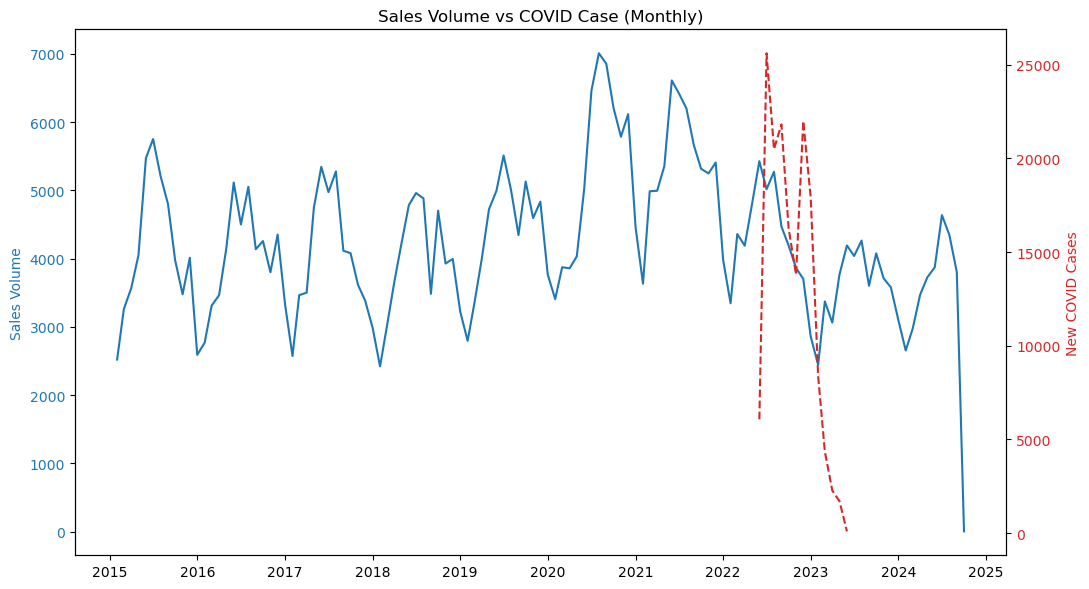

In [675]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(11, 6))

# Sales Volume (left axis)
ax1.plot(
    combined_df["YearMonth_dt"],
    combined_df["Sales Volume"],
    label="Sales Volume",
    color="tab:blue"
)
ax1.set_ylabel("Sales Volume", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# COVID cases (right axis)
ax2 = ax1.twinx()
ax2.plot(
    combined_df["YearMonth_dt"],
    combined_df["total_new_cases"],
    label="New COVID Cases",
    color="tab:red",
    linestyle="--"
)
ax2.set_ylabel("New COVID Cases", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Sales Volume vs COVID Case (Monthly)")
fig.tight_layout()

plt.savefig(
    f"{output_dir}/sales_volume_vs_covid.png",
    dpi=300,
    bbox_inches="tight")

plt.show()


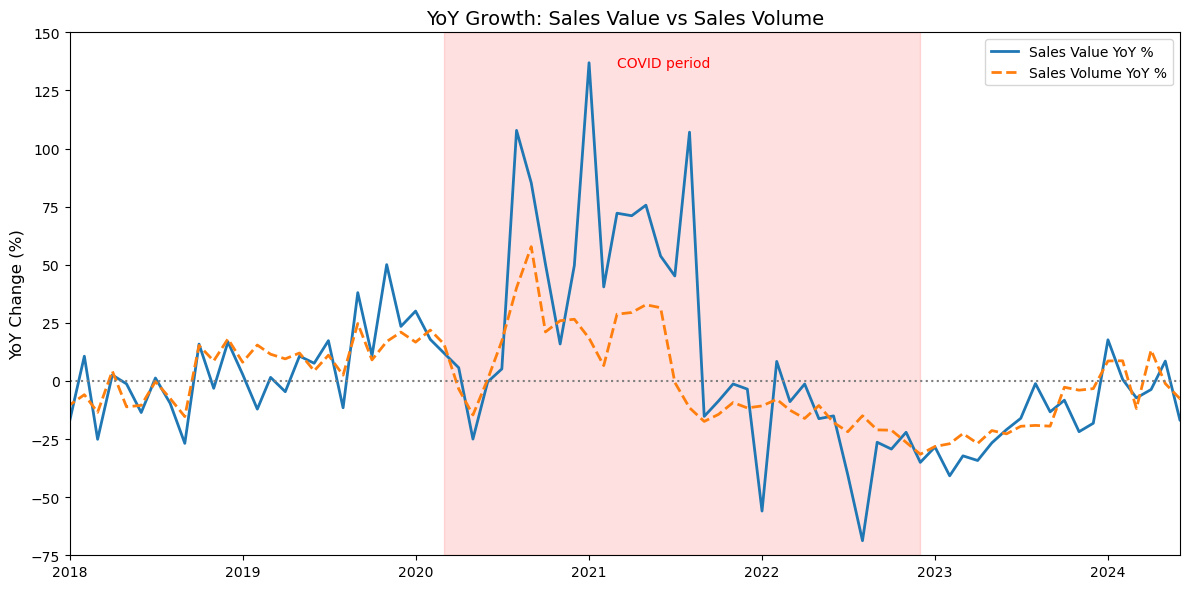

In [695]:
# YoY calculations
combined_df["Sales Value YoY %"] = (
    combined_df["Sales Value (bn USD)"]
    .pct_change(12) * 100
)

combined_df["Sales Volume YoY %"] = (
    combined_df["Sales Volume"]
    .pct_change(12) * 100
)

plt.figure(figsize=(12, 6))

# Plot YoY lines
sns.lineplot(
    data=combined_df,
    x="YearMonth_dt",
    y="Sales Value YoY %",
    label="Sales Value YoY %",
    linewidth=2
)

sns.lineplot(
    data=combined_df,
    x="YearMonth_dt",
    y="Sales Volume YoY %",
    label="Sales Volume YoY %",
    linestyle="--",
    linewidth=2
)

# Baseline
plt.axhline(0, color="grey", linestyle=":")

# Highlight COVID period
plt.axvspan(
    pd.Timestamp("2020-03-01"),
    pd.Timestamp("2022-12-01"),
    color="red",
    alpha=0.12
)

# Titles & labels
plt.title("YoY Growth: Sales Value vs Sales Volume", fontsize =14)
plt.ylabel("YoY Change (%)", fontsize =12)
plt.xlabel("")
plt.xlim(pd.Timestamp("2018-01-01"), pd.Timestamp("2024-06-01"))
plt.ylim(-75,150)
# Annotation
plt.text(
    pd.Timestamp("2021-03-01"),
    plt.ylim()[1] * 0.90,
    "COVID period",
    color="red",
    fontsize=10
)

plt.legend()
plt.tight_layout()

# Save
#title = plt.gca().get_title().replace(" ", "_").lower()

plt.savefig(
    f"{output_dir}/{title}.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

### Observations

**Year-over-year metrics effectively remove seasonality and isolate structural shocks**

**Sales value growth is significantly more volatile than sales volume**

- Sales value YoY has extreme swings (>100% during 2020–2021 and <−60% in 2022), while sales volume remains comparatively stable.
- This indicates that price effects, rather than changes in transaction counts, were the dominant driver of total sales fluctuations.
- This highlights how supply shortages, bidding pressure, and shifts toward higher-value properties amplified sales value independently of deal volume.

**COVID produced an abnormal price-led cycle rather than a volume-led one**
- This behavior contrasts with typical downturns, which usually show volume declines first and sustained price weakness